In [ ]:
!pip install ImageHash
!pip install distance
!pip install vptree
!pip install gdown

In [2]:
!gdown --id 1IQ90jtnITrrcBWsFjF8jkFXF7LAxDqLF

Downloading...
From: https://drive.google.com/uc?id=1IQ90jtnITrrcBWsFjF8jkFXF7LAxDqLF
To: /content/archive.zip
650MB [00:13, 46.7MB/s]


In [3]:
%%time
import zipfile
zip_ref = zipfile.ZipFile("archive.zip", 'r')
zip_ref.extractall("./scenery")
zip_ref.close()

CPU times: user 3.51 s, sys: 942 ms, total: 4.46 s
Wall time: 4.6 s


In [4]:
import matplotlib.pyplot as plt
def show_images(images, figsize=(20,10), columns = 5):
  plt.figure(figsize=figsize)
  for i, image in enumerate(images):
      plt.subplot(len(images) / columns + 1, columns, i + 1)
      plt.imshow(image)

In [5]:
import os
IMAGE_PATH="./scenery"
file_names=os.listdir(IMAGE_PATH)
print(f"number of images: {len(file_names)}")

number of images: 4319


Вычисляем хеши

In [6]:
from PIL import Image
import imagehash
import numpy as np
import distance
hashes = {}
file_names=os.listdir(IMAGE_PATH)
for file_name in file_names:
  phash=str(imagehash.phash(Image.open(f'{IMAGE_PATH}/{file_name}'),16))
  if phash in hashes:
    hashes[phash].append(file_name)
  else:
    hashes[phash]=[file_name]

In [7]:
print(f"number of unique images: {len(hashes.keys())}")

number of unique images: 4123


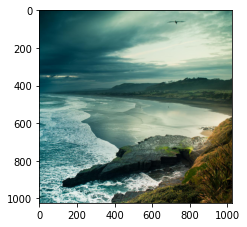

In [8]:
query_image=Image.open(f'{IMAGE_PATH}/00000015.jpg')
query_image_phash=str(imagehash.phash(query_image,16))
show_images([np.array(query_image)])

In [9]:
# import random
# import string
# def get_random_string(length):
#     # choose from all lowercase letter
#     letters = string.ascii_lowercase
#     result_str = ''.join(random.choice(letters) for i in range(length))
#     return result_str
# big_array=[]
# for _ in range(100000):
#   big_array.append(get_random_string(64))

In [10]:
%%time
hamming_distances=[]
for phash in hashes.keys():
  hamming_distances.append({"dist":distance.hamming(query_image_phash,phash),"phash":phash})
hamming_distances.sort(key=lambda item: item["dist"])
hamming_distances=hamming_distances[:10]

CPU times: user 46.3 ms, sys: 1.06 ms, total: 47.3 ms
Wall time: 57.4 ms


In [11]:
print(hamming_distances)
found_images=[]
for it in hamming_distances:
  found_images.append(hashes[it["phash"]])
found_images = [item for sublist in found_images for item in sublist]
images_np=[]
for image_filename in found_images:
  images_np.append(np.array(Image.open(f'{IMAGE_PATH}/{image_filename}')))

[{'dist': 0, 'phash': '91189ee70f8a857dc8d66e2fc7059cd7c36c1dc320559b0970de0fe1321d65e6'}, {'dist': 52, 'phash': '9d179197cfe40e586bd98383e3c56ed071da3193806b704d2fccb1eab227b285'}, {'dist': 52, 'phash': 'e19de8441f8b9c7398776a24638ee3c3e41884779c291bf77386e3e4071d2db0'}, {'dist': 53, 'phash': '8510e2b5d44a8641daa66dbf35b13554964fcac3e1b569bc364a1af30e5e651d'}, {'dist': 53, 'phash': '99148f17078b653dfd605f86f0dce6d926476664fe6172c87070f47731338838'}, {'dist': 53, 'phash': 'd018b4e4abc32e1d3e3861e2d78e150b3571a1c72e1cebbb4ae11e2e343bf570'}, {'dist': 53, 'phash': 'f947fa4b0ed82c54185763c771e89c389e15b0d370d66b8d8f289e29d54365c6'}, {'dist': 53, 'phash': 'eaba9cd9f004b5ad8cda62768ad5348fd168caf3ec8c7350a545ccccb92165c6'}, {'dist': 53, 'phash': '8195fa6af58a2875524a85bff2753fd0caa5544ac9d5363eadc24a31d906954b'}, {'dist': 53, 'phash': '951162e72853f76cca811d7607926c4a3328998bf564dcd4eb52cfe9c6dd234a'}]


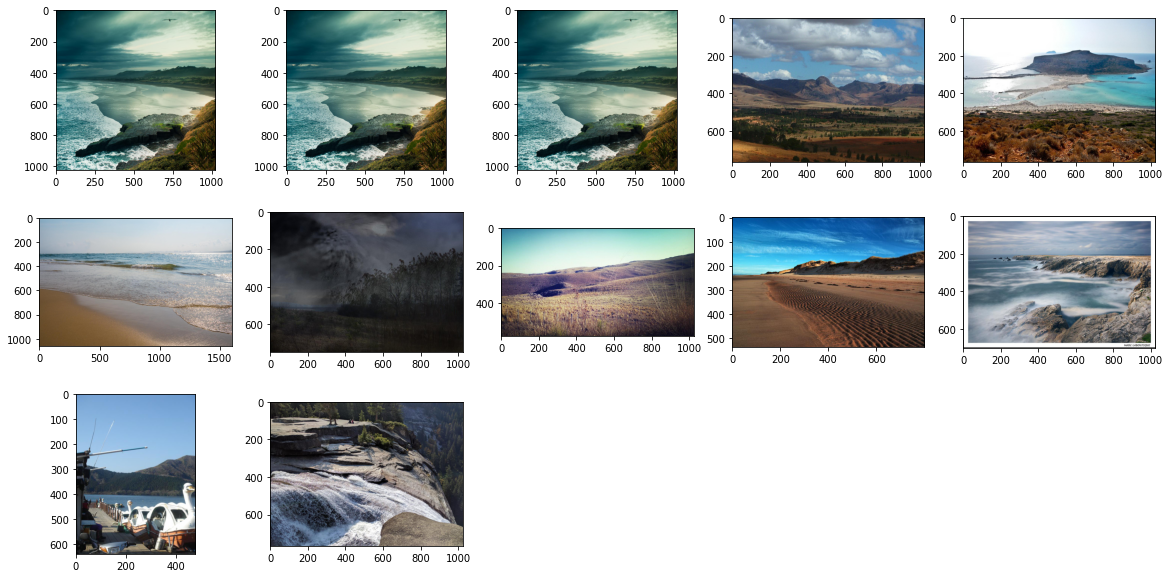

In [12]:
show_images(images_np)

In [13]:
import vptree
tree = vptree.VPTree(list(hashes.keys()), distance.hamming)

In [14]:
%%time
neighbors=tree.get_n_nearest_neighbors(query_image_phash, 10)

CPU times: user 40.1 ms, sys: 0 ns, total: 40.1 ms
Wall time: 40.6 ms


In [15]:
print(neighbors)
vptree_found_images=[]
for neighbor in neighbors:
  vptree_found_images.append(hashes[neighbor[1]])
vptree_found_images = [item for sublist in vptree_found_images for item in sublist]
images_np_vptree=[]
for image_filename in vptree_found_images:
  images_np_vptree.append(np.array(Image.open(f'{IMAGE_PATH}/{image_filename}')))

[(0, '91189ee70f8a857dc8d66e2fc7059cd7c36c1dc320559b0970de0fe1321d65e6'), (52, '9d179197cfe40e586bd98383e3c56ed071da3193806b704d2fccb1eab227b285'), (52, 'e19de8441f8b9c7398776a24638ee3c3e41884779c291bf77386e3e4071d2db0'), (53, 'eaba9cd9f004b5ad8cda62768ad5348fd168caf3ec8c7350a545ccccb92165c6'), (53, '99148f17078b653dfd605f86f0dce6d926476664fe6172c87070f47731338838'), (53, 'd018b4e4abc32e1d3e3861e2d78e150b3571a1c72e1cebbb4ae11e2e343bf570'), (53, '9175bcfaaafd6ac85fd615eb95cb05c7285f20a750de9c94c0a28557861d6648'), (53, '8510e2b5d44a8641daa66dbf35b13554964fcac3e1b569bc364a1af30e5e651d'), (53, 'f947fa4b0ed82c54185763c771e89c389e15b0d370d66b8d8f289e29d54365c6'), (53, '8195fa6af58a2875524a85bff2753fd0caa5544ac9d5363eadc24a31d906954b')]


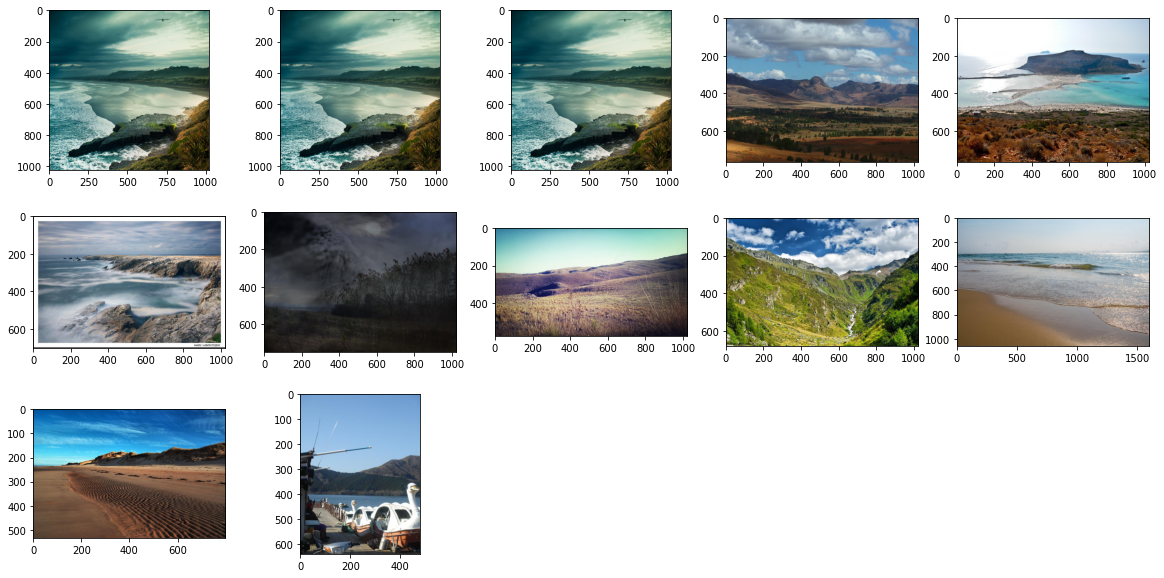

In [16]:
show_images(images_np_vptree)

2


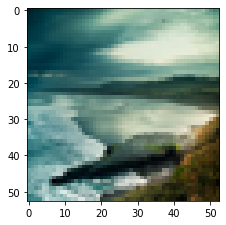

In [17]:
width, height = query_image.size
query_image_resized=query_image.resize((width//19, height//19))
print(distance.hamming(query_image_phash,str(imagehash.phash(query_image_resized,16))))
show_images([np.array(query_image_resized)])

0


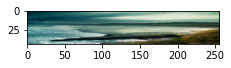

In [18]:
query_image_resized_2=query_image.resize((width//4, height//23))
print(distance.hamming(query_image_phash,str(imagehash.phash(query_image_resized_2,16))))
show_images([np.array(query_image_resized_2)])

58


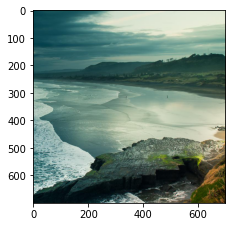

In [19]:
crop_rectangle = (200, 200, 900, 900)
query_image_cropped = query_image.crop(crop_rectangle)
print(distance.hamming(query_image_phash,str(imagehash.phash(query_image_cropped,16))))
show_images([np.array(query_image_cropped)])

64


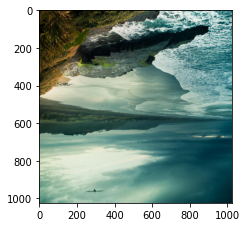

In [20]:
query_image_rotated = query_image.rotate(180)
print(distance.hamming(query_image_phash,str(imagehash.phash(query_image_rotated,16))))
show_images([np.array(query_image_rotated)])